<a href="https://colab.research.google.com/github/kristinavq/DS5100-2025-01-O/blob/main/module1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1

## DS-6040
### Bayesian Machine learning


# Big Picture Stuff...

## What is ML?

- machine learning draws inference about data using statistical models
- statistical models are probabilistic, and involve unknown parameters and known (and sometimes  unknown!) data
- inferences can be made about unknown **data** (e.g. prediction, forecasting, etc.)
- inferences can also be about unknown **parameters**

## When is ML <ins>Bayesian</ins>?

Bayesian ML is when you put probability distributions on **everything that's unknown.** In particular, we don't avoid talking about the randomness of model parameters like frequentists do!

Bayesian ML is **not** just when you use Bayes' rule in some shape or form.


## When is it better to be Bayesian?

 1. Sometimes it "works better"
 2. Sometimes it's the same as being frequentist
 3. The theory can be more natural and general
 4. You're probably already Bayesian (at least a little)

## Starting Simply

Let's call
 - $y$ all of our data
 - $\theta$ all of our parameters

A **Bayesian model** consists of two things:

 1. a likelihood: $L(y \mid \theta)$
 2. a prior: $\pi(\theta)$

After we apply Bayes' rule, we will obtain the **posterior**: $\pi(\theta \mid y)$




## Starting Simply


### The likelihood:  $L(y \mid \theta)$

 - pick this based on what your data look like


### The prior: $\pi(\theta)$

 - describes your beliefs about $\theta$ **before conditioning on data**
 - specific formula depends on what is chosen


### The posterior : $\pi(\theta \mid y)$

 - describes your beliefs about $\theta$ **after conditioning on data**


## Starting Simply

The posterior can then be used for creating parameter intervals, parameter point estimates, predictions and forecasts.

It is the primary goal because it is the first stepping stone.

On the other hand, frequentists:

   - do not believe in putting distributions on the unknown parameters
   - No prior or posterior for them!
   - Likelihood is not a distribution conditional on $\theta$
   - i.e. $L(y ; \theta)$  instead of $L(y \mid \theta)$ even though specific choice function can be written identically
   - primarily interested in **optimizing** $L(y ; \theta)$



## Required Math Tool 1


The vertical bar in the above notation represents **conditioning**.

 - $L(y \mid \theta)$ is the conditional distribution of the data **given** a particular $\theta$
 - $\pi(\theta \mid y)$ is the conditional distribution of the parameter **given** the data set you observed $y$

Suppose $p(y, \theta)$ is the distribution of both quantities, neither one conditioning on the other. Then

$
\begin{align*}
L(y \mid \theta) = \frac{p(y, \theta)}{\pi(\theta)}
\end{align*}
$




Intuition: a Venn diagram.

## Required Math Tool 1

### For arbitrary random variables $A,B$ and $C$

  - In general:  $p(A,B) = p(A \mid B)p(B)$
  - or $p(A,B) = p(B \mid A)p(A)$
  - if the two sets are **independent:** $p(A,B) = p(A)p(B)$

### A little fancier

 - always: $p(A,B \mid C) = p(A \mid B, C) p(B \mid C)$
 - if $A$ and $B$ are **conditionally independendent** given $C$: $p(A,B \mid C) = p(A \mid C) p(B \mid C)$



Independence and conditional independence aren't always true. Assuming then is often done in models for tractability.






## Required Math Tool 2


**Integration** takes us from "joint" distributions to "marginal" ones.

Example, we integrate out $\theta$ from the joint distribution:

 - $p(y) =  \int p(y, \theta) \text{d}\theta = \int L(y \mid \theta)\pi(\theta) \text{d}\theta$




## Bayes' Rule

All of these are Bayes' rule

$
\begin{align}
\pi(\theta \mid y)
&= \frac{L(y \mid \theta) \pi(\theta) }{p(y)} \\
&= \frac{L(y \mid \theta) \pi(\theta) }{\int L(y \mid \theta)\pi(\theta) \text{d}\theta} \\
&\propto  L(y \mid \theta) \pi(\theta) \\
\end{align}
$


## Finding The Posterior


What does $\pi(\theta \mid y) \propto L(y \mid \theta) \pi(\theta)$ mean **in practice**?

It depends on your model and your data!

Here are our three situations:

  1. If you know $p(y)$, there is an exact formula for $\pi(\theta \mid y)$
  2. If you don't, you pick an algorithm that let's you draw samples from $\pi(\theta \mid y)$,
  3. If you don't, you can also pick an algorithm that provides a $q(\theta)$ that is provably "close" to $\pi(\theta \mid y)$


If you don't, the last resort is to just optimize $\pi(\theta \mid y)$, but then you're not getting the whole posterior.




## Finding The Posterior


The three situations:

  1. If you know $p(y)$, there is an exact formula for $\pi(\theta \mid y)$
  2. If you don't, you pick an algorithm that let's you draw samples from $\pi(\theta \mid y)$,
  3. If you don't, you can also pick an algorithm that provides a $q(\theta)$ that is provably "close" to $\pi(\theta \mid y)$
  
  
 "Knowing" $p(y) = \int L(y \mid \theta)\pi(\theta) \text{d}\theta$ means you can write a function that evaluates it exactly.

Take in any $y$, return the exact `float`.

Possible iff you can solve the integral.

## Historical and Computing Considerations

 - Situation 1 is uncommon, but understanding the math is important for many models and algorithms
 - Situation 2 has stronger theoretical guarantees than Situation 3, but is less "scalable" in practice
     - when parameter space is strange
     - when parameter space is high-dimensional
     - when your data is massive
 - Situation 2 is favored in some areas, while situation 3 is favored in other areas. People tend to specialize in one or the other

## Example 1: flip a (possibly unfair) coin once.

 - data: $y$ can take on values $\{0, 1\}$.
 - parameter: $\theta$ probability of heads, somewhere between $0$ and $1$
 - likelihood $L(y \mid \theta)$ is $\theta$ when $y$ is $1$. It's $1-\theta$ otherwise.




In [ ]:
## Example 1: flip a (possibly unfair) coin once.
import numpy as np

def likelihood_eval(y, theta):
    """writing a likelihood evaluator function"""
    if np.isclose(y, 1):
        return theta
    elif np.isclose(y, 0.0):
        return 1.0 - theta
    else:
        return 0
likelihood_eval(1, .5001) # slightly biased towards heads!

0.5001

## Example 1: flip a (possibly unfair) coin once.

### The prior

Also pick a prior distribution $\pi(\theta)$. This represents our beliefs about what $\theta$ could be. We should choose it before looking at any data whatsoever.

I believe that

 - $\theta$ is "pretty close" to $.5$
 - there's no way it can be $\le 0$ or $\ge 1$

Let's use a **Beta distribution**.

In [ ]:
## Example 1: flip a (possibly unfair) coin once.

### The prior
from scipy.stats import beta

def my_prior(theta):
    return beta.pdf(theta, 20, 20)

my_prior(.5)

5.014827504783157

## Visualizing the Prior Density

![The prior](prior.png)

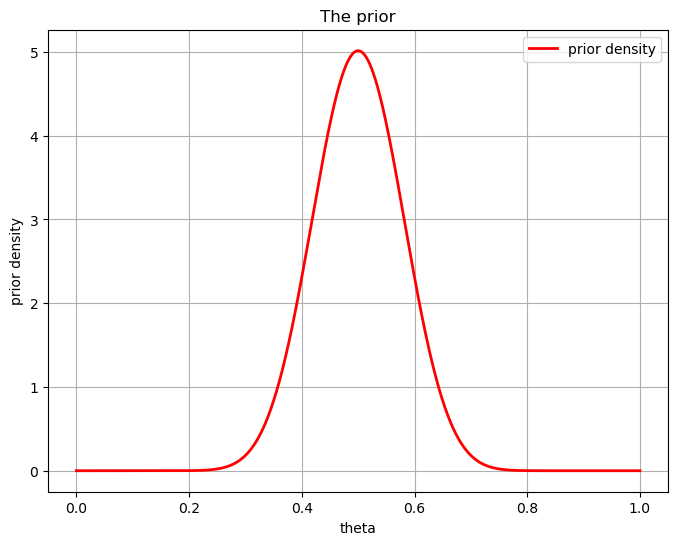

In [ ]:
## Example 1: flip a (possibly unfair) coin once.
import matplotlib.pyplot as plt

possible_thetas = np.linspace(0, 1, 1000)
plt.figure(figsize=(8, 6))
plt.plot(possible_thetas, my_prior(possible_thetas), 'r-', lw=2, label='prior density')
plt.title('The prior'.format(20, 20))
plt.xlabel('theta')
plt.ylabel('prior density')
plt.legend()
plt.grid(True)
plt.show()

## Visualizing the Prior Density


![The prior and likelihood](prior_and_likelihood.png)

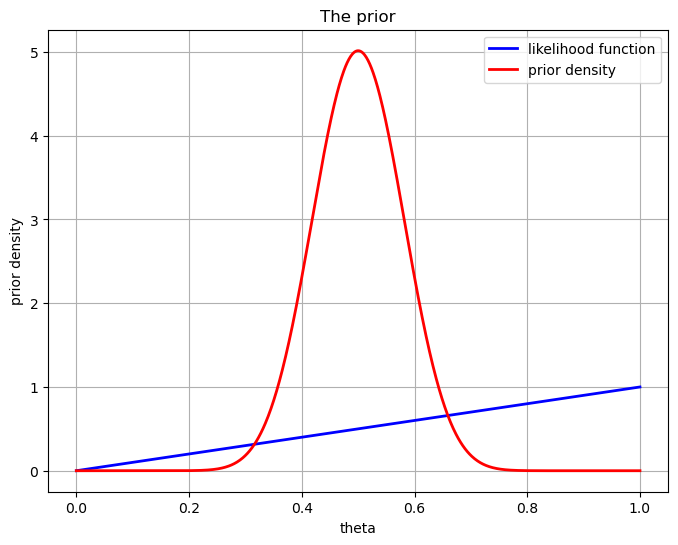

In [ ]:
## Example 1: flip a (possibly unfair) coin once.

import matplotlib.pyplot as plt

possible_thetas = np.linspace(0, 1, 1000)
plt.figure(figsize=(8, 6))
plt.plot(possible_thetas, [likelihood_eval(1, theta) for theta in possible_thetas], 'b-', lw=2, label='likelihood function')
plt.plot(possible_thetas, my_prior(possible_thetas), 'r-', lw=2, label='prior density')
plt.title('The prior'.format(20, 20))
plt.xlabel('theta')
plt.ylabel('prior density')
plt.legend()
plt.grid(True)
plt.show()

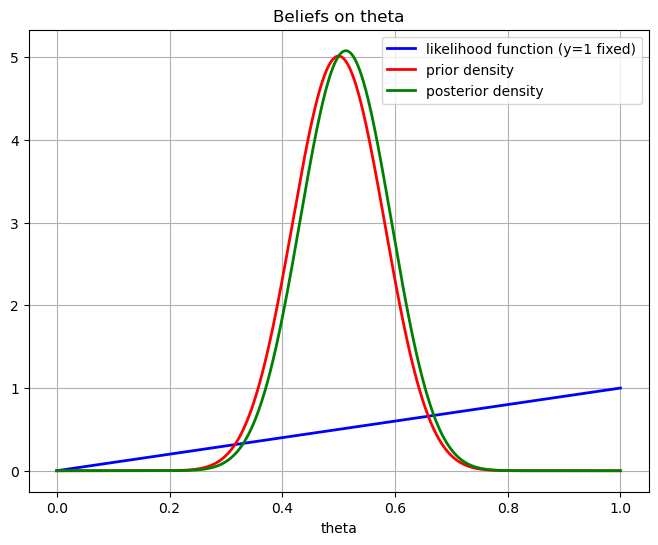

In [ ]:
## Example 1: flip a (possibly unfair) coin once.

import numpy as np
import matplotlib.pyplot as plt

possible_thetas = np.linspace(0, 1, 1000)
likes = [likelihood_eval(1, theta) for theta in possible_thetas]
priors = my_prior(possible_thetas)
posterior = beta.pdf(possible_thetas, 21,20)
unnorm_post = likes * priors #TODO make this exercse

plt.figure(figsize=(8, 6))
plt.plot(possible_thetas, likes, 'b-', lw=2, label='likelihood function (y=1 fixed)')
plt.plot(possible_thetas, priors, 'r-', lw=2, label='prior density')
plt.plot(possible_thetas, posterior, 'g-', lw=2, label='posterior density')

plt.title('Beliefs on theta'.format(20, 20))
plt.xlabel('theta')
plt.ylabel('')
plt.legend()
plt.grid(True)
plt.show()

## Visualizing all Three Functions


![The prior, likelihood and posterior](all_three.png)

## In Summary

- $y$ can be have any shape, size or dimension!
- So can $\theta$
- Sometimes we will have to break up data or parameters into chunks, which requires different notation
- Frequentists directly maximize the likelihood $L(y \mid \theta)$
- Choosing/designing a likelihood can be challenging
- Bayesians have an extra responsibility of choosing a prior:  $\pi(\theta)$
- a prior represents a person's beliefs before they see any data

**Bayes' rule gives you a way to update your beliefs about $\theta$ after you observed the data set you got!**

### References

[Bayesian Data Analysis 3](https://sites.stat.columbia.edu/gelman/book/BDA3.pdf) Chapters 2.1-2.4